<a href="https://colab.research.google.com/github/kchaitanya954/Machine-learning-technologies/blob/main/Task4_Pasala_Krishna_Chaitanya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

italicized text## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16, ResNet50
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [ ]:
# if you are using google colab for this task you can mount your GoogleDrive as follows: 
from google.colab import drive
drive.mount('/content/drive/')

# After running this cell you should enter the authorization code from your Google account

Mounted at /content/drive/


In [ ]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = '/content/drive/My Drive/Colab Notebooks/Cats_and_Dogs/train'
val =   '/content/drive/My Drive/Colab Notebooks/Cats_and_Dogs/val'
test =  '/content/drive/My Drive/Colab Notebooks/Cats_and_Dogs/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20019 
# validation set size 
nb_validation_samples = 2499 
# test set size
nb_test_samples = 2509 

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20019 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.
Found 2509 images belonging to 2 classes.


In [ ]:
label_map=train_generator.class_indices
label_map

{'cats': 0, 'dogs': 1}

Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [ ]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

#     +Relu

# 4:  +Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5:  +Convolutional
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#     +Relu
# 6:  +Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))
# 7:  +Flattening
model.add (Flatten ())
# 8:  +Dense
#     +ReLu
model.add(Dense(64))
model.add(Activation('relu'))
# 9:  +Dropout
model.add (Dropout (0.5))
# 10: +Dense
#     +Sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

loss_acc=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
312/312 [==============================] - 78s 249ms/step - loss: 0.0830 - accuracy: 0.9645 - val_loss: 0.7307 - val_accuracy: 0.8277
Epoch 2/20
312/312 [==============================] - 78s 252ms/step - loss: 0.0799 - accuracy: 0.9659 - val_loss: 0.8106 - val_accuracy: 0.8273
Epoch 3/20
312/312 [==============================] - 78s 251ms/step - loss: 0.0701 - accuracy: 0.9701 - val_loss: 0.8863 - val_accuracy: 0.8377
Epoch 4/20
312/312 [==============================] - 79s 252ms/step - loss: 0.0719 - accuracy: 0.9678 - val_loss: 0.8934 - val_accuracy: 0.8253
Epoch 5/20
312/312 [==============================] - 78s 252ms/step - loss: 0.0722 - accuracy: 0.9672 - val_loss: 0.9612 - val_accuracy: 0.8245
Epoch 6/20
312/312 [==============================] - 78s 251ms/step - loss: 0.0728 - accuracy: 0.9677 - val_loss: 0.8947 - val_accuracy: 0.8277
Epoch 7/20
312/312 [==============================] - 78s 251ms/step - loss: 0.0696 - accuracy: 0.9691 - val_loss: 0.9210 - val_ac

In [ ]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong
# test data accuracy after 20 epochs of 3 Layer CNN
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 84.50%


In [ ]:
scores

[0.8993646502494812, 0.8449519276618958]

Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

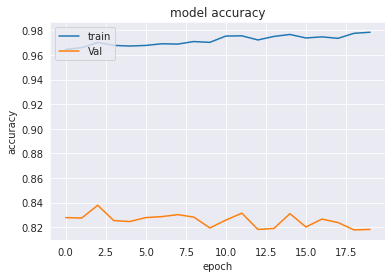

In [ ]:
# summarize history for accuracy
loss_acc.history.keys()
plt.plot(loss_acc.history['accuracy'])
plt.plot(loss_acc.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

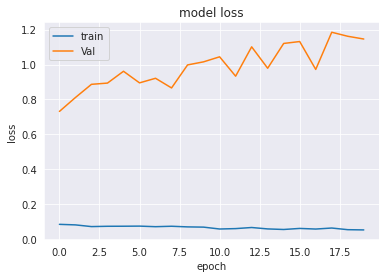

In [ ]:
# summarize history for loss
plt.plot(loss_acc.history['loss'])
plt.plot(loss_acc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

From the above graphs it can be observed that as the epochs increase the accuracy of the model is increasing

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [ ]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [ ]:
# add layers to VGG16:

model_vgg16 = Sequential()
model_vgg16.add(vgg16_net)

# + flattening
model_vgg16.add (Flatten ())
# + Dense fullyconnected layer with 256 neurons
# + ReLu
model_vgg16.add(Dense(256))
model_vgg16.add(Activation('relu'))
# + Dropout
model_vgg16.add (Dropout (0.5))
# + Dense layer with 1 neuron
# + sigmoid
model_vgg16.add(Dense(1))
model_vgg16.add(Activation('sigmoid'))

model_vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_6 (Activation)    (None, 1)                

In [ ]:
model_vgg16.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [ ]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

vgg16=model_vgg16.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
312/312 [==============================] - 89s 284ms/step - loss: 0.5094 - accuracy: 0.7414 - val_loss: 0.3546 - val_accuracy: 0.8598
Epoch 2/5
312/312 [==============================] - 87s 278ms/step - loss: 0.3429 - accuracy: 0.8518 - val_loss: 0.3008 - val_accuracy: 0.8826
Epoch 3/5
312/312 [==============================] - 86s 276ms/step - loss: 0.3006 - accuracy: 0.8730 - val_loss: 0.2749 - val_accuracy: 0.8866
Epoch 4/5
312/312 [==============================] - 85s 273ms/step - loss: 0.2761 - accuracy: 0.8844 - val_loss: 0.2583 - val_accuracy: 0.9034
Epoch 5/5
312/312 [==============================] - 85s 272ms/step - loss: 0.2581 - accuracy: 0.8925 - val_loss: 0.2475 - val_accuracy: 0.9091


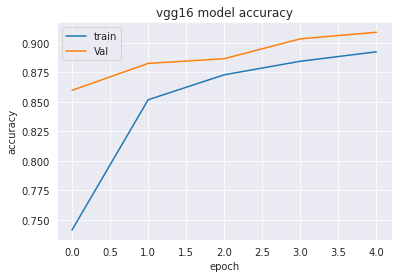

In [ ]:
# summarize history for accuracy for vgg16

loss_acc.history.keys()
plt.plot(vgg16.history['accuracy'])
plt.plot(vgg16.history['val_accuracy'])
plt.title('vgg16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

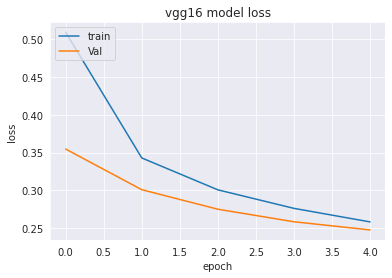

In [ ]:
# summarize history for loss
plt.plot(vgg16.history['loss'])
plt.plot(vgg16.history['val_loss'])
plt.title('vgg16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

Accuracy on test data using vgg16

In [ ]:
# test data accuracy after 5 epochs
scores = model_vgg16.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 89.38%


###ResNet50 Model

In [ ]:
# First, download the weights of the ResNet50 network trained on the ImageNet dataset:

ResNet50_net = ResNet50(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
ResNet50_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

#ResNet50_net.summary()                       # pay attention to the number of trained and untrained parameters

In [ ]:
# add layers to ResNet50:

model_ResNet50 = Sequential()
model_ResNet50.add(ResNet50_net)

# + flattening
model_ResNet50.add (Flatten ())
# + Dense fullyconnected layer with 256 neurons
# + ReLu
model_ResNet50.add(Dense(256))
model_ResNet50.add(Activation('relu'))
# + Dropout
model_ResNet50.add (Dropout (0.5))
# + Dense layer with 1 neuron
# + sigmoid
model_ResNet50.add(Dense(1))
model_ResNet50.add(Activation('sigmoid'))

model_ResNet50.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               13107456  
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_10 (Activation)   (None, 1)                

In [ ]:
model_ResNet50.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [ ]:

history_resnet50=model_ResNet50.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
312/312 [==============================] - 87s 278ms/step - loss: 0.6038 - accuracy: 0.6767 - val_loss: 0.5921 - val_accuracy: 0.6891
Epoch 2/5
312/312 [==============================] - 87s 278ms/step - loss: 0.5972 - accuracy: 0.6847 - val_loss: 0.5872 - val_accuracy: 0.6939
Epoch 3/5
312/312 [==============================] - 87s 278ms/step - loss: 0.5919 - accuracy: 0.6900 - val_loss: 0.5877 - val_accuracy: 0.6975
Epoch 4/5
312/312 [==============================] - 86s 277ms/step - loss: 0.5887 - accuracy: 0.6896 - val_loss: 0.5792 - val_accuracy: 0.6991
Epoch 5/5
312/312 [==============================] - 86s 277ms/step - loss: 0.5839 - accuracy: 0.6984 - val_loss: 0.5816 - val_accuracy: 0.6971


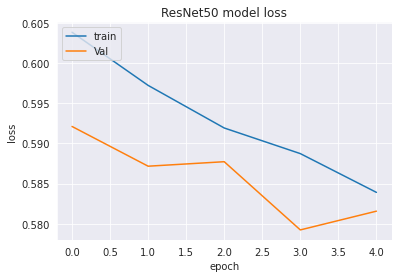

In [ ]:
# summarize history for loss
plt.plot(history_resnet50.history['loss'])
plt.plot(history_resnet50.history['val_loss'])
plt.title('ResNet50 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

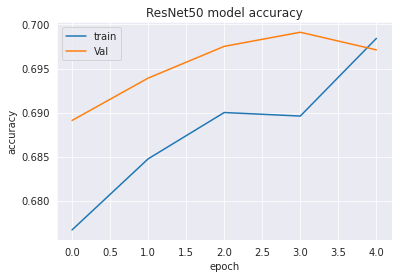

In [ ]:
# summarize history for accuracy

plt.plot(history_resnet50.history['accuracy'])
plt.plot(history_resnet50.history['val_accuracy'])
plt.title('ResNet50 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

Accuracy on test data usning ResNet50

In [ ]:
# test data accuracy after 5 epochs

scores = model_ResNet50.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 69.35%


Check the performance of your model with the custom image of cat or dog

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.image as mpimg


In [ ]:
#Loading the three built models
model_ResNet50.save('resnet50.h5')
model_vgg16.save('vgg16.h5')
model.save('3CNN.h5')
model_3cnn = load_model('3CNN.h5')
model_vgg=load_model('vgg16.h5')
model_res=load_model('resnet50.h5')


In [ ]:
# function loads the image
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)                   
    img_tensor = np.expand_dims(img_tensor, axis=0)         
    imag = np.vstack([img_tensor])
    if show:
        img = mpimg.imread(img_path)
        plt.figure(figsize = (5,8))
        plt.imshow(img)
        plt.show()

    return imag


In [ ]:
# Class labels generated to dogs and cats
label_map=train_generator.class_indices
label_map

{'cats': 0, 'dogs': 1}

In [ ]:
#Function predicts the class of the image
def predict_img(model_name, img_path, show=True):
  imag=load_image(img_path, show)
  cls={0:'cats', 1:'dogs'}
  classes=model_name.predict_classes(imag, batch_size=64)
  print(classes)
  return cls[classes[0][0]]

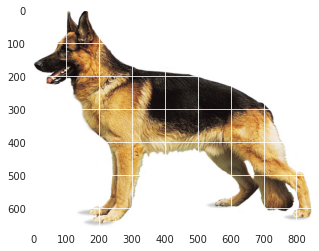

[[1]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'DOG'

In [ ]:
#Predicting dog image using vgg16 model

predict_img(model_vgg, '/content/drive/My Drive/Colab Notebooks/dog.jpg', True )

In [ ]:
#Predicting dog image using ResNet50 model
predict_img(model_res, '/content/drive/My Drive/Colab Notebooks/dog.jpg', False )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[1]]


'DOG'

In [ ]:
#Predicting dog image using three layer CNN model
predict_img(model_3cnn, '/content/drive/My Drive/Colab Notebooks/dog.jpg', False )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[1]]


'DOG'

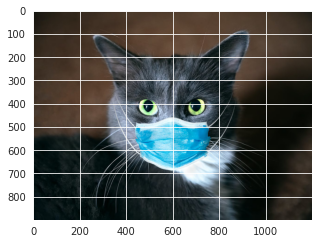

[[0]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'CAT'

In [ ]:
#Predicting cat image using vgg16 model

predict_img(model_vgg, '/content/drive/My Drive/Colab Notebooks/cat.jpg', True )

The three models have predicted the Dog and cat images correctly.